In [ ]:
from PIL import Image
import numpy as np
from torchvision.io import read_image
from torchvision.utils import save_image

# Path to the locally saved image
image_path = '/Users/navtegh/Downloads/whatwewant.png'

# Load the image
# image = Image.open(image_path)
image = read_image(image_path)


# # Convert the image to a NumPy array to view its shape
# image_array = np.array(image)
# print(f"Image shape: {image_array.shape}")


In [202]:
image_array = np.array(image)

In [203]:
np.unique(image_array[:,:,:])

array([237, 249, 251, 252, 253, 254, 255], dtype=uint8)

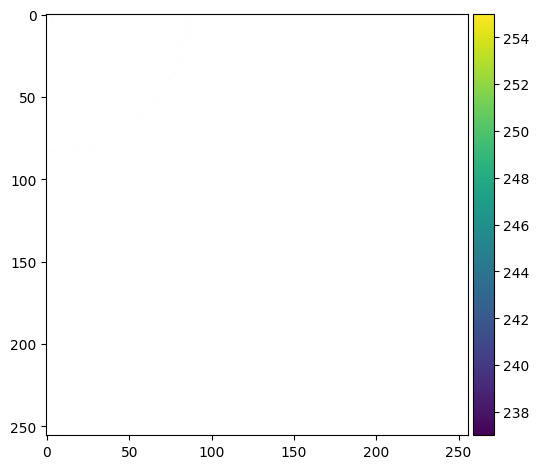

In [205]:
io.imshow(image_array[:,:,:])

In [151]:
from scipy.fft import dct
def idct2d(matrix):
    """
    Compute the 2D inverse DCT of an input matrix.
    """
    return dct(dct(matrix.T, norm='ortho').T, norm='ortho')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


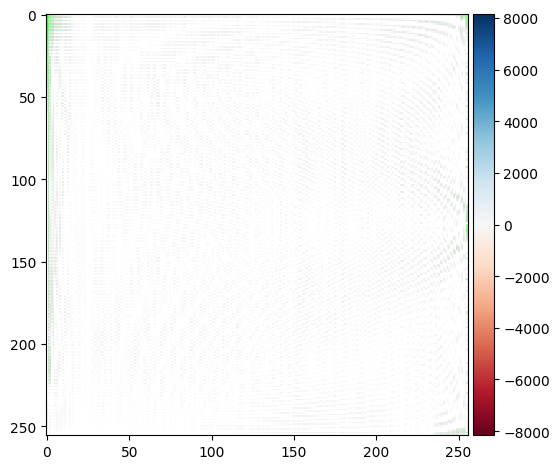

In [157]:
io.imshow(idct2d(image_array[:,:,:]))

In [206]:
import torch_dct

In [207]:
imgd=torch.tensor(image_array)

In [216]:
xyz=torch_dct.dct_2d(image)

In [217]:
xyz.shape

torch.Size([3, 256, 256])

In [210]:
from torchvision.utils import save_image

In [219]:
save_image(xyz[:,:,:],"xyz_image.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


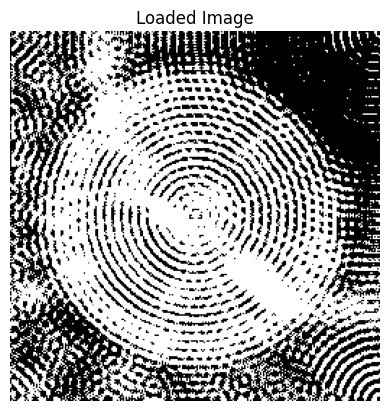

In [222]:
plt.imshow(xyz.permute(1, 2, 0))  # Change from [C, H, W] to [H, W, C] for visualization
plt.title("Loaded Image")
plt.axis("off")
plt.show()

In [134]:
image_array[:,:,0]

array([[255,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [73]:
from skimage import io

/Users/navtegh/miniconda/envs/eeg/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


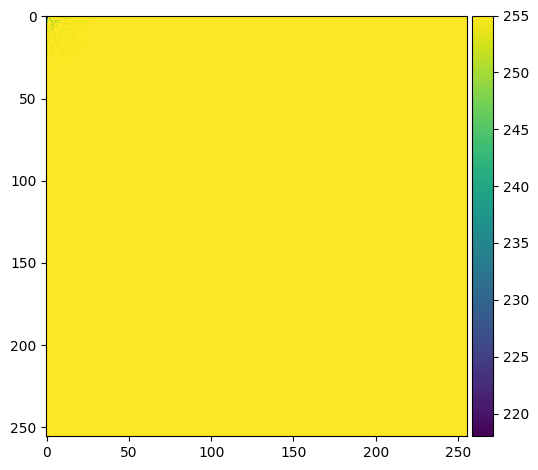

In [77]:
io.imshow(image_array[:,:,3])

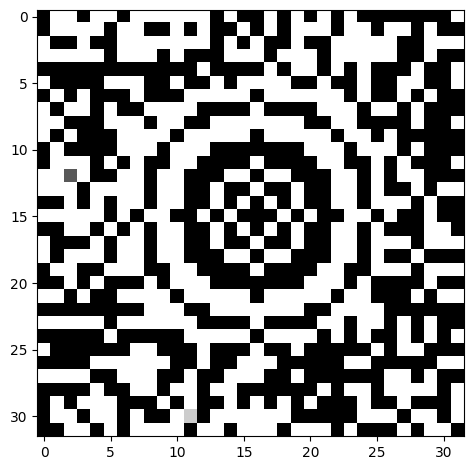

In [21]:
io.imshow(image_array[:,:,3])

In [6]:
for i in range(5, 0, -1):
    print(i)


5
4
3
2
1


In [7]:
imag=image_array[:,:,:-1]

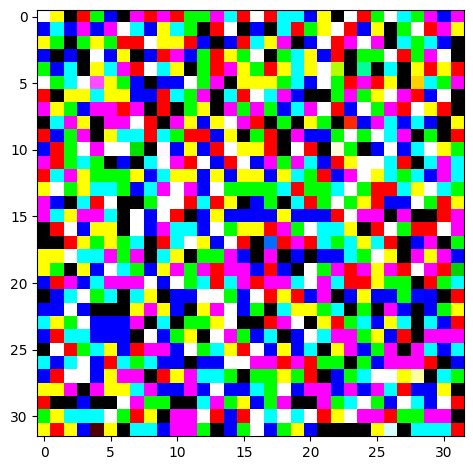

In [8]:
io.imshow(imag)

In [22]:
imagreal=image_array[:,:,3]

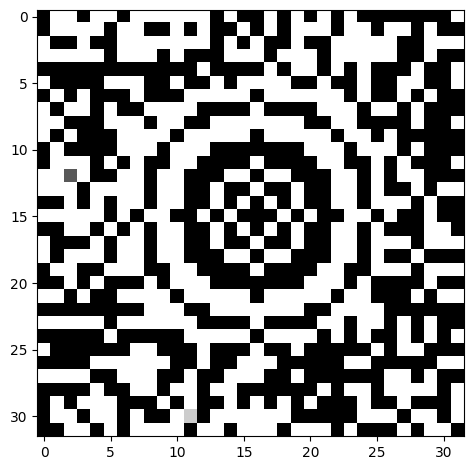

In [23]:
io.imshow(imagreal)

In [24]:
key=image_array[:,:,3]

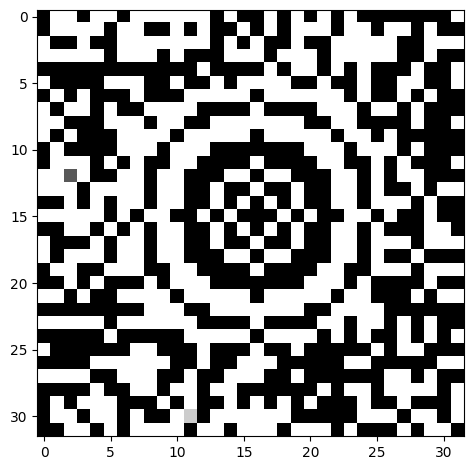

In [25]:
io.imshow(key)

In [26]:
import matplotlib.pyplot as plt

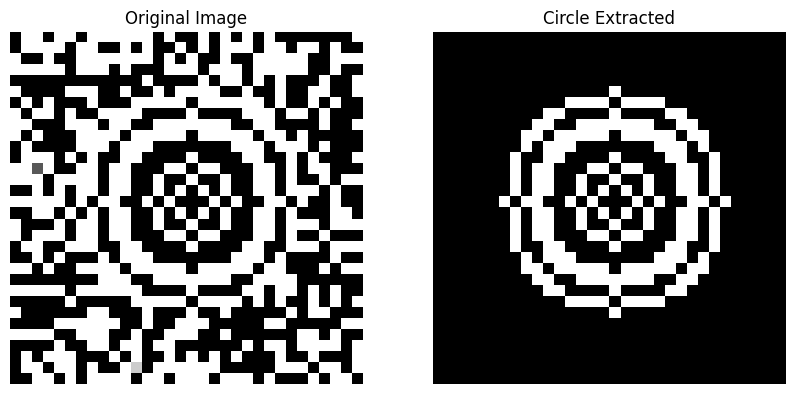

In [30]:
center = (16, 15)  # Center of the image (assuming 0-indexing)
radius = 10

# Create a mask for the circle
Y, X = np.ogrid[:32, :32]
distance_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
circle_mask = distance_from_center <= radius

# Apply the mask to the image
circle_image = np.zeros_like(key)
circle_image[circle_mask] = key[circle_mask]

# Display the original and circle-masked image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(key, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Circle Extracted")
plt.imshow(circle_image, cmap='gray')
plt.axis('off')

plt.show()

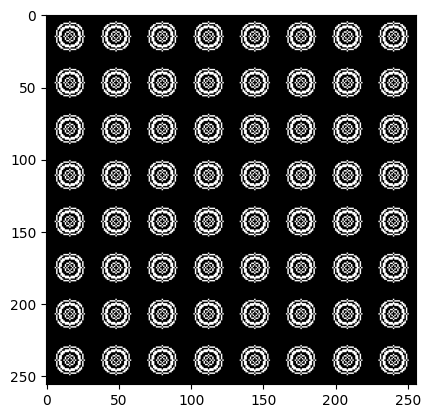

In [35]:
plt.imshow(np.tile(circle_image, (8, 8)) ,cmap='gray')

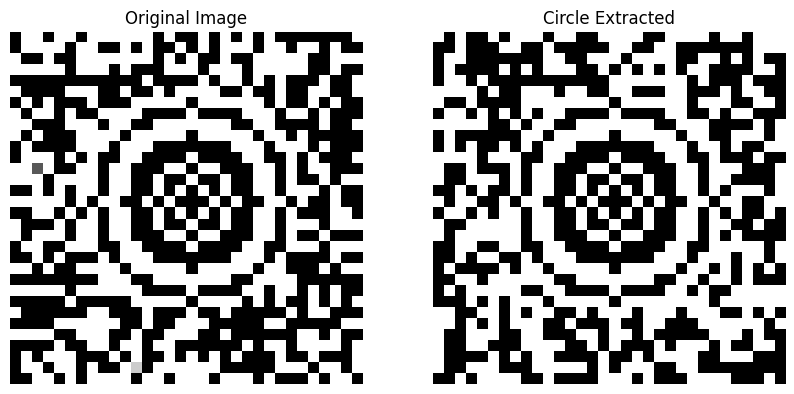

In [28]:
center = (16, 15)  # Center of the image (assuming 0-indexing)
radius = 10

# Create a mask for the circle
Y, X = np.ogrid[:32, :32]
distance_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
circle_mask = distance_from_center <= radius

# Apply the mask to the image
circle_image = np.random.randint(0, 2, key.shape) * 255
circle_image[circle_mask] = key[circle_mask]

# Display the original and circle-masked image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(key, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Circle Extracted")
plt.imshow(circle_image, cmap='gray')
plt.axis('off')

plt.show()

In [62]:
np.set_printoptions(threshold=np.inf)

In [120]:
ones=np.ones((32,32))

In [121]:
ones.shape

(32, 32)

In [124]:
ones[circle_mask]=key[circle_mask]

/Users/navtegh/miniconda/envs/eeg/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


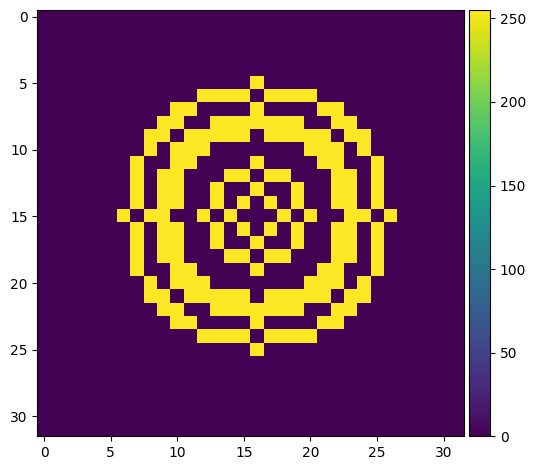

In [125]:
io.imshow(ones)

In [119]:
print(circle_mask)

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [Fal

In [129]:
indices=np.where(circle_image==0)
circle_image[indices]=-1

In [130]:
print(circle_image)

[[-1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1
   1 -1  1 -1  1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1
   1  1  1  1 -1 -1 -1 -1]
 [-1  1  1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1  1
   1 -1 -1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1  1
   1 -1 -1  1  1  1  1  1]
 [-1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1
   1 -1 -1 -1  1  1  1  1]
 [ 1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1
  -1  1  1 -1 -1  1  1  1]
 [ 1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1 -1
   1  1  1 -1 -1  1  1 -1]
 [-1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1
  -1  1 -1 -1  1 -1 -1  1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1
  -1 -1 -1 -1  1 -1 -1  1]
 [-1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
   1 -1  1 -1 -1 

In [131]:
np.savetxt("file1.txt", circle_image, fmt='%d')

In [132]:
circle_image

array([[-1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
        -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1],
       [ 1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1],
       [-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1],
       [-1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1],
       [-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
         1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1],
       [ 1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
         1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1],
       [ 1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1

In [42]:
plt.imsave('watermark.png', circle_image, cmap='gray')

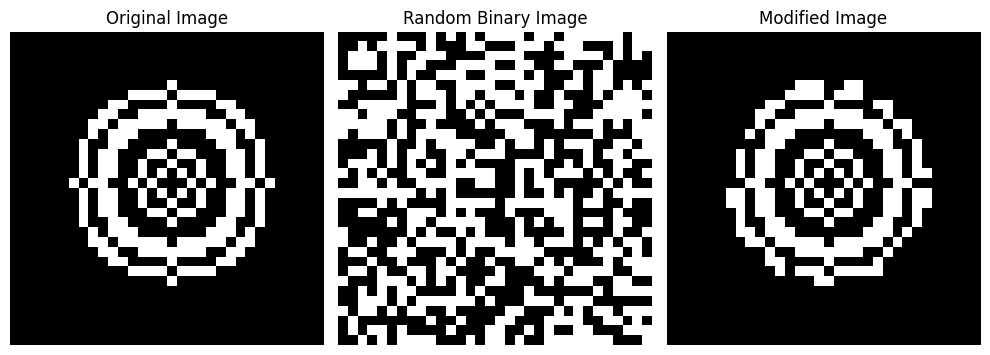

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the provided image
original_image_path = './watermark.png'
original_image = Image.open(original_image_path).convert('L')  # Convert to grayscale
original_array = np.array(original_image)

# Generate a 32x32 random binary image
random_binary_image = np.random.randint(0, 2, (32, 32)) * 255  # Binary values 0 or 255

# Define circle parameters
center = (16, 15)  # Given center coordinates
radius = 10

# Create a mask for the ring pattern
Y, X = np.ogrid[:32, :32]
distance_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
ring_mask = (distance_from_center <= radius + 0.5) & (distance_from_center >= radius - 0.5)

# Replace the ring in the original image with the values from the random binary image
new_image_array = original_array.copy()
new_image_array[ring_mask] = random_binary_image[ring_mask]

# Plotting results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Random Binary Image")
plt.imshow(random_binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Modified Image")
plt.imshow(new_image_array, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


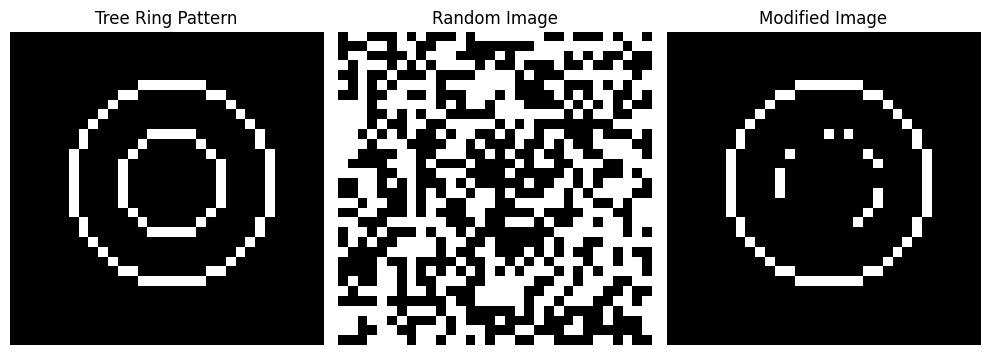

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic tree ring pattern
def generate_tree_ring_pattern(size, center, radii, ring_width):
    """Generates a tree ring pattern on a binary image of specified size."""
    Y, X = np.ogrid[:size, :size]
    distance_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

    tree_ring_pattern = np.zeros((size, size), dtype=np.uint8)

    # Create rings by iterating over specified radii
    for radius in radii:
        ring_mask = (distance_from_center <= radius + ring_width / 2) & (distance_from_center >= radius - ring_width / 2)
        tree_ring_pattern[ring_mask] = 255  # White ring on black background

    return tree_ring_pattern

# Define parameters
size = 32
center = (16, 15)
radii = [10, 5]  # Multiple radii for tree rings
ring_width = 1  # Width of each ring

# Generate tree ring pattern
tree_ring_image = generate_tree_ring_pattern(size, center, radii, ring_width)

# Step 2: Generate a random binary image for replacement
random_binary_image = np.random.randint(0, 2, (size, size)) * 255

# Replace the outermost ring in the tree pattern with the corresponding pixels from the random image
distance_from_center = np.sqrt((np.arange(size)[:, None] - center[1])**2 + (np.arange(size) - center[0])**2)
replacement_ring = (distance_from_center <= radii[-1] + ring_width / 2) & (distance_from_center >= radii[-1] - ring_width / 2)

# Replace the pixels in `replacement_ring`
output_image = tree_ring_image.copy()
output_image[replacement_ring] = random_binary_image[replacement_ring]

# Step 3: Plot results
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.title("Tree Ring Pattern")
plt.imshow(tree_ring_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Random Image")
plt.imshow(random_binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Modified Image")
plt.imshow(output_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


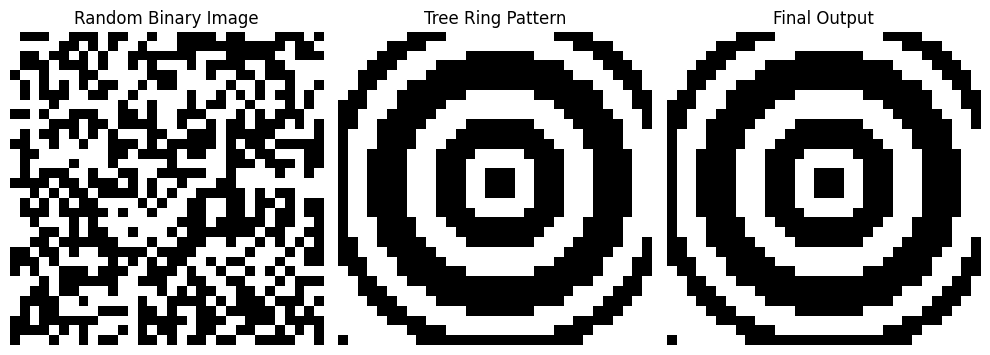

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a random binary image of size 32x32
random_binary_image = np.random.randint(0, 2, (32, 32)) * 255

# Step 2: Manually create the tree ring pattern with varying widths and alternating colors
size = 32
center = (16, 15)  # Center of the image (x, y)
tree_ring_pattern = np.zeros((size, size), dtype=np.uint8)

# Manually define the radii and the corresponding widths for each ring.
# Each tuple is (radius, width), and we alternate between black (0) and white (255).
radii_and_widths = [
    (3, 2),  # radius 3, width 2
    (6, 3),  # radius 6, width 3
    (9, 4),  # radius 9, width 4
    (12, 5), # radius 12, width 5
    (15, 3), # radius 15, width 3
    (18, 4), # radius 18, width 4
    (21, 6), # radius 21, width 6
    (24, 4), # radius 24, width 4
    (27, 5), # radius 27, width 5
    (30, 2), # radius 30, width 2
]

# Generate concentric rings with varying widths and alternating intensities
for i, (radius, width) in enumerate(radii_and_widths):
    Y, X = np.ogrid[:size, :size]
    distance_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    
    # Generate a ring by creating a mask for pixels within the radius and width range
    ring_mask = (distance_from_center >= radius - width / 2) & (distance_from_center < radius + width / 2)
    
    # Alternate ring colors (white for even, black for odd)
    if i % 2 == 0:
        tree_ring_pattern[ring_mask] = 255  # White ring
    else:
        tree_ring_pattern[ring_mask] = 0  # Black ring

# Step 3: Combine the tree ring pattern with the random binary image
output_image = random_binary_image.copy()
output_image[tree_ring_pattern == 255] = 255  # White rings from the tree ring pattern on the random image
output_image[tree_ring_pattern == 0] = 0    # Black rings

# Step 4: Visualize the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Random Binary Image')
plt.imshow(random_binary_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Tree Ring Pattern')
plt.imshow(tree_ring_pattern, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Final Output')
plt.imshow(output_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()


In [86]:
arr=np.array([[1,0,0,1],[1,0,0,1],[1,0,0,1],[1,0,0,1]])

In [135]:
circle_mask

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, F

In [87]:
arr

array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1]])

In [91]:
arr=np.expand_dims(arr,-1)

In [92]:
arr.shape

(4, 4, 1)

In [97]:
np.broadcast_to(arr,(4,16,16))

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,4,1)  and requested shape (4,16,16)

import torch

In [98]:
import torch

In [114]:
msgs_ori = torch.rand((1,4,4)) > 0.5 # b k
msgs = 2 * msgs_ori.type(torch.float) - 1

In [115]:
msgs = msgs.unsqueeze(-1).unsqueeze(-1) # b l 1 1
print(msgs.shape)

torch.Size([1, 4, 4, 1, 1])


In [116]:
print(msgs)

tensor([[[[[ 1.]],

          [[ 1.]],

          [[-1.]],

          [[ 1.]]],


         [[[-1.]],

          [[-1.]],

          [[ 1.]],

          [[-1.]]],


         [[[ 1.]],

          [[-1.]],

          [[-1.]],

          [[ 1.]]],


         [[[-1.]],

          [[ 1.]],

          [[ 1.]],

          [[-1.]]]]])


In [117]:
msgs = msgs.expand(-1,-1, -1, 16, 16)

In [118]:
print(msgs.shape)

torch.Size([1, 4, 4, 16, 16])


In [133]:
tt=torch.tensor([[-1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
        -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1],
       [ 1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1],
       [-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1],
       [-1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1],
       [-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
         1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1],
       [ 1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
         1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1],
       [ 1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1],
       [-1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
         1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1],
       [-1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
         1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1],
       [-1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
       [ 1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
        -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1],
       [-1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
         1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1],
       [-1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1],
       [-1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
         1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1],
       [ 1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
        -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1],
       [-1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1],
       [-1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
         1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1],
       [ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
         1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1],
       [-1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
        -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1],
       [-1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1],
       [-1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
         1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
         1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1],
       [ 1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1],
       [-1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
         1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1],
       [-1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
         1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1],
       [ 1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
         1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1],
       [ 1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,
        -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1],
       [-1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
        -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1],
       [-1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
         1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
        -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1]])

In [134]:
tt

tensor([[-1, -1, -1,  ..., -1, -1, -1],
        [ 1, -1, -1,  ..., -1, -1, -1],
        [-1,  1,  1,  ..., -1, -1, -1],
        ...,
        [-1, -1,  1,  ...,  1,  1,  1],
        [-1,  1, -1,  ...,  1, -1, -1],
        [-1, -1,  1,  ...,  1,  1, -1]])

In [136]:
circle= torch.tensor([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]])

In [137]:
circle

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [139]:
msgs_ori = torch.rand((16,32,32)) > 0.5 # b k k
msgs = 2 * msgs_ori.type(torch.float) - 1 # b k k
        
key=torch.tensor([[-1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
-1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1],
[ 1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
-1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1],
[-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
-1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1],
[-1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
-1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1],
[-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
 1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1],
[ 1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
 1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1],
[ 1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
-1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1],
[-1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
 1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1],
[-1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
 1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1],
[-1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
-1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
[ 1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
-1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1],
[-1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
 1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1],
[-1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
-1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1],
[-1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
 1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1],
[-1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
-1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1],
[ 1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
-1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1],
[-1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
-1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1],
[-1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
 1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1],
[ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
-1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1],
[ 1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
 1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1],
[-1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
-1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1],
[-1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
-1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1],
[-1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
 1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1],
[ 1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
 1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1],
[ 1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
-1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1],
[-1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
 1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1],
[-1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
 1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1],
[ 1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
 1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1],
[ 1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,
-1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1],
[-1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
-1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1],
[-1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
 1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1],
[-1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
-1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1]]).type(torch.float)

circle_mask= torch.tensor([[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False,  True, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False,  True,  True,  True,  True,  True,  True,
 True,  True,  True, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False, False,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True,  True, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False,  True,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True,  True, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
 True,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True,  True, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False,  True,  True,  True,  True,  True,  True,  True,  True,
 True,  True,  True,  True,  True, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False,  True,  True,  True,  True,  True,  True,
 True,  True,  True, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False,  True, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False],
[False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False, False, False, False, False,
False, False, False, False, False]])
msgs[:,circle_mask] = key[circle_mask] 

In [205]:
msgs[0,:,:]

tensor([[ 1., -1., -1.,  ..., -1.,  1.,  1.],
        [ 1.,  1.,  1.,  ..., -1., -1.,  1.],
        [-1., -1.,  1.,  ..., -1.,  1., -1.],
        ...,
        [ 1., -1., -1.,  ...,  1.,  1.,  1.],
        [ 1., -1., -1.,  ...,  1., -1., -1.],
        [ 1., -1.,  1.,  ...,  1., -1., -1.]])

In [215]:
msgs.shape

torch.Size([16, 32, 32])

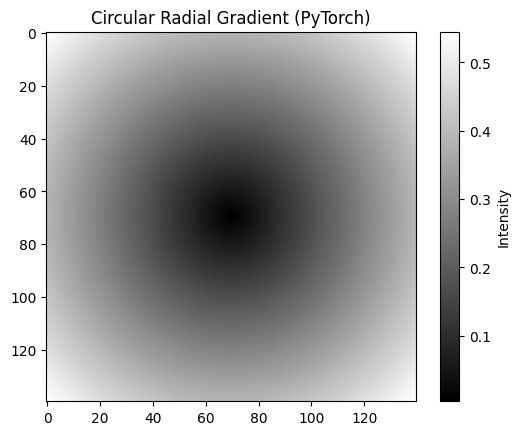

In [18]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def generate_radial_gradient_image(h):
    # Create a grid of (x, y) coordinates normalized between -1 and 1
    height=256
    y = torch.linspace(-1, 1, steps=height).unsqueeze(1).expand(height, height)  # Vertical grid
    x = torch.linspace(-1, 1, steps=height).unsqueeze(0).expand(height, height)   # Horizontal grid

    # Compute the radial distance from the center
    radius = torch.sqrt(x**2 + y**2)  # Euclidean distance
    
    # Normalize the distance values to [0, 1]
    max_radius = torch.sqrt(torch.tensor(2.0))  # Max radius in a square [-1, 1] x [-1, 1]
    gradient = radius / max_radius

    # Clip values to ensure they stay between 0 and 1
    gradient = torch.clamp(gradient, 0.0, 1.0)
    
    target_size = h  # Final size for height and width
    current_size = height  # Original size of the image

    # Compute cropping boundaries
    crop_margin = (current_size - target_size) // 2  # Amount to crop from each side


    cropped_tensor = TF.crop(gradient, 
                             top=crop_margin, 
                             left=crop_margin, 
                             height=target_size, 
                             width=target_size)
    return cropped_tensor


# Generate the radial gradient using PyTorch
radial_gradient = generate_radial_gradient_image(140)

# Convert to numpy for visualization
radial_gradient_np = radial_gradient.numpy()

# Display the image
plt.imshow(radial_gradient_np, cmap='gray')
plt.title("Circular Radial Gradient (PyTorch)")
plt.colorbar(label="Intensity")
plt.show()



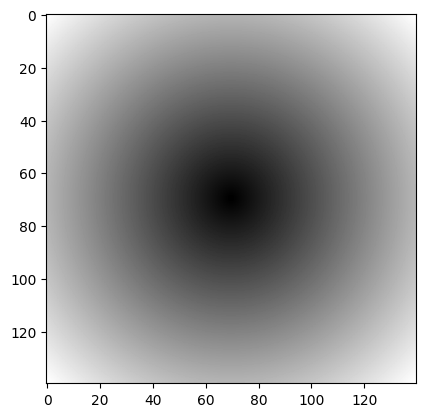

In [20]:
plt.imshow(2*radial_gradient_np-1, cmap='gray')

In [22]:
fts=[256,140,256,140,140]

In [32]:
msgs=[]
for i in range(5):
    e=fts[i]
    msgs.append(generate_radial_gradient_image(e))
print(msgs[:].shape)

AttributeError: 'list' object has no attribute 'shape'

In [31]:
m=tor
torch.Tensor(msgs[:])

ValueError: only one element tensors can be converted to Python scalars

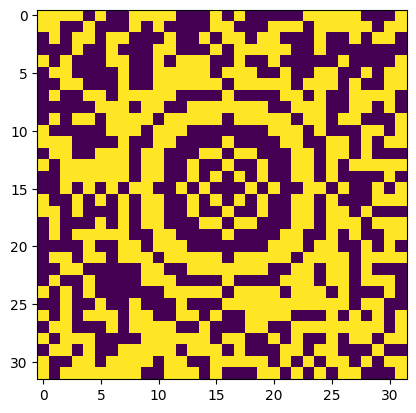

In [206]:
plt.imshow(  msgs[1] )

In [39]:
import torch
import torch.nn.functional as F


# Resize to 256x256
expanded_image = F.interpolate(msgs.unsqueeze(1), size=(256, 256), mode='bilinear', align_corners=False)

print(f"Original shape: {msgs.shape}")
print(f"Expanded shape: {expanded_image.shape}")

NameError: name 'msgs' is not defined

tensor([-1.0000, -0.9922, -0.9766, -0.9609, -0.9453, -0.9297, -0.9141, -0.8984,
        -0.8828, -0.8750, -0.8359, -0.8047, -0.7891, -0.7656, -0.7578, -0.7422,
        -0.7266, -0.6953, -0.6484, -0.6250, -0.6172, -0.5703, -0.5469, -0.5234,
        -0.5078, -0.4922, -0.4141, -0.3984, -0.3906, -0.3750, -0.3672, -0.3281,
        -0.3203, -0.2891, -0.2344, -0.2266, -0.1797, -0.1406, -0.1250, -0.1172,
        -0.1094, -0.0859, -0.0781, -0.0547, -0.0469, -0.0156,  0.0156,  0.0469,
         0.0547,  0.0781,  0.0859,  0.1094,  0.1172,  0.1250,  0.1406,  0.1797,
         0.2266,  0.2344,  0.2891,  0.3203,  0.3281,  0.3672,  0.3750,  0.3906,
         0.3984,  0.4141,  0.4922,  0.5078,  0.5234,  0.5469,  0.5703,  0.6172,
         0.6250,  0.6484,  0.6953,  0.7266,  0.7422,  0.7578,  0.7656,  0.7891,
         0.8047,  0.8359,  0.8750,  0.8828,  0.8984,  0.9141,  0.9297,  0.9453,
         0.9609,  0.9766,  0.9922,  1.0000])

In [193]:
expanded_tensor = msgs.repeat_interleave(8, dim=1).repeat_interleave(8, dim=2)

In [234]:
msgs.shape

torch.Size([16, 32, 32])

In [194]:
expanded_tensor.shape

torch.Size([16, 256, 256])

In [235]:
expanded_tensor = msgs.repeat(1,8,8)

In [236]:
expanded_tensor.shape

torch.Size([16, 256, 256])

In [210]:
expanded_tensor[0].max()

tensor(1.)

In [195]:
stacked_tensor = expanded_tensor.unsqueeze(1).repeat(1,8, 1, 1)

In [223]:
stacked_tensor.unique()

tensor([-1.,  1.])

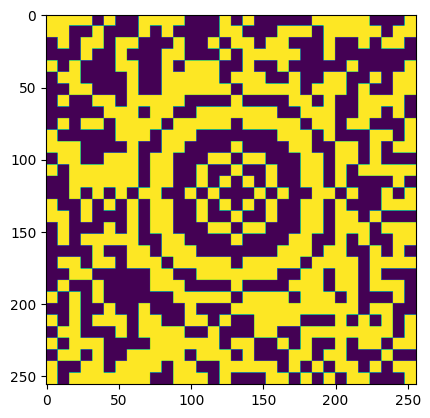

In [224]:
plt.imshow(  stacked_tensor[1,1])

In [182]:
b= torch.tensor([1,1,-1,-1,1,-1])

In [183]:
b = b.unsqueeze(-1).unsqueeze(-1)

In [184]:
b = b.expand(-1, 16,16)

In [185]:
b.shape

torch.Size([6, 16, 16])

In [192]:
b[-1]

tensor([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -

In [232]:
original_array=original_array/255

In [237]:
original_array= 2*original_array -1


In [238]:
original_array

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
  

In [ ]:
original_array

In [1]:
import utils_model
import torch

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
msg_decoder = utils_model.get_hidden_decoder(num_bits=32, redundancy=1, num_blocks=8, channels=64).to(device)
ckpt = utils_model.get_hidden_decoder_ckpt('/Users/navtegh/Documents/checkpoint_highacc.pth')

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [8]:
msg_decoder.load_state_dict(ckpt, strict=False)
msg_decoder.eval()

HiddenDecoder(
  (layers): Sequential(
    (0): ConvBNRelu(
      (layers): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): GELU(approximate='none')
      )
    )
    (1): ConvBNRelu(
      (layers): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): GELU(approximate='none')
      )
    )
    (2): ConvBNRelu(
      (layers): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): GELU(approximate='none')
      )
    )
    (3): ConvBNRelu(
      (layers): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Ba

In [9]:
import torchvision


In [25]:
img=torchvision.io.read_image('/Users/navtegh/Downloads/monkey.jpg')

In [27]:
abc=img.repeat(1,1,1,1)
abc.shape
x=msg_decoder(abc.type(torch.float))

torch.Size([1, 3, 256, 256])

In [29]:
x.shape

torch.Size([1, 32, 32])

In [30]:
x[0,16,:]

tensor([-0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.0444, -2.4125,
        -0.6805, -1.9679, -2.3209, -0.4241, -0.5813, -1.3464, -0.4129, -1.1829,
        -0.5108, -1.1829, -0.4129, -1.3464, -0.5813, -0.4241, -2.3209, -1.9679,
        -0.6805, -2.4125, -0.0444, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000],
       grad_fn=<SliceBackward0>)

In [31]:
img.shape

torch.Size([3, 256, 256])

In [32]:
import matplotlib.pyplot as plt

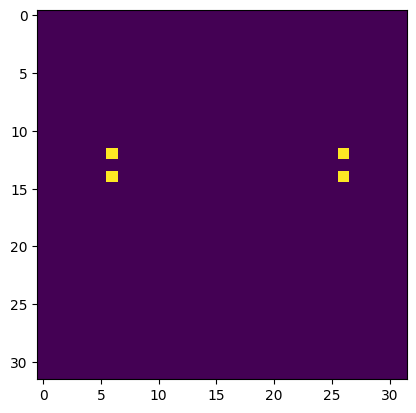

In [33]:
plt.imshow(  x[0].detach().numpy()>0)

In [19]:
x[0].detach().numpy().max()

1.4581856

In [67]:
import torch
import torch.fft


In [69]:

# Create the constant tensor
batch_size, num_channels_latents, height, width = 1, 1, 256, 256
tensor = torch.ones((batch_size, num_channels_latents, height, width))

# Apply 2D DCT (example using torch.fft.fft2)
dct_output = torch.fft.fft2(tensor)

# Print the output
print(dct_output)

tensor([[[[65536.+0.j,     0.+0.j,     0.+0.j,  ...,     0.+0.j,     0.+0.j,     0.+0.j],
          [    0.+0.j,     0.+0.j,     0.+0.j,  ...,     0.+0.j,     0.+0.j,     0.+0.j],
          [    0.+0.j,     0.+0.j,     0.+0.j,  ...,     0.+0.j,     0.+0.j,     0.+0.j],
          ...,
          [    0.+0.j,     0.+0.j,     0.+0.j,  ...,     0.+0.j,     0.+0.j,     0.+0.j],
          [    0.+0.j,     0.+0.j,     0.+0.j,  ...,     0.+0.j,     0.+0.j,     0.+0.j],
          [    0.+0.j,     0.+0.j,     0.+0.j,  ...,     0.+0.j,     0.+0.j,     0.+0.j]]]])
